# Line Fitting

##### Install packeges

In [ ]:
%pip install numpy pandas matplotlib seaborn scikit-learn statsmodels jupyter


#### Import dependencies 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h4>Initialize random sequence</h4>

In [3]:
a = 20
b = 10
x = np.linspace(-100,100,1000) # generate 1000 points, spaced regularly in [-100, 100]
y = a + b*x + np.random.uniform(low=-1000,high=1000,size=x.shape)
data = pd.DataFrame({'x':x, 'y':y})

#### View the data

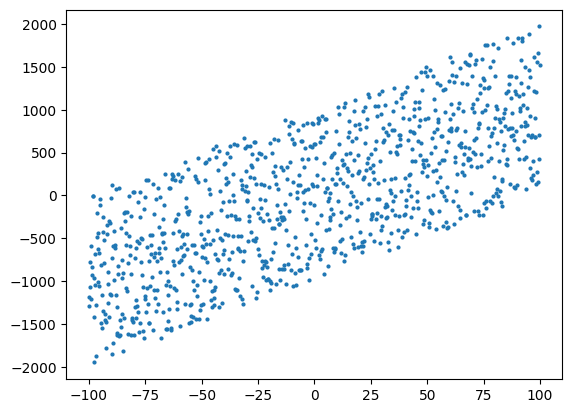

In [4]:
plt.scatter(x,y,s=4)
plt.show()

<h2>Fit  data to the polynomial</h2>  
polyfit performs least squares fit to find coefficients p for the polynomial of the given degree so that 
p(x) = p[0] * x**deg + ... + p[deg]

In [5]:
polynomial_coeff = np.polyfit(x, y, 1)
print('Polynom coefficients: a='+str(polynomial_coeff[1])+' b='+str(polynomial_coeff[0]))
poly_fit_object = np.poly1d(polynomial_coeff) 

Polynom coefficients: a=-12.815168106698273 b=10.012119337725503


<h4>Plot fitted curve over the data</h4>

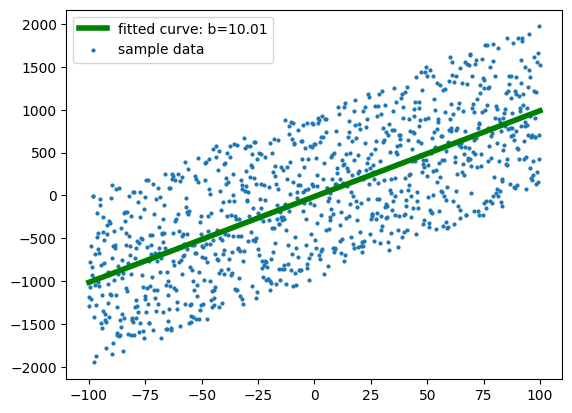

In [6]:
plt.plot(x,poly_fit_object(x),'g-', 
   label = 'fitted curve: b={0:2.2f}'.format(polynomial_coeff[0]),
   linewidth = 4)
plt.scatter(data['x'],data['y'],s=4, label = 'sample data')
plt.legend()
plt.show()

## Use linear regression to learn the curve coefficients


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = x.reshape((len(x), 1))  # Reshape x
y = y.reshape((len(y), 1))  # Reshape y

lm = LinearRegression()
lm.fit(x, y)

# Predict y for calculating R^2
y_pred = lm.predict(x)

# Now print properly
print(f"Regression trained: R^2 = {r2_score(y, y_pred):3.3f}")  # Corrected to actually print R^2
print(f"y ~ {lm.intercept_[0]:2.2f} + {lm.coef_[0,0]:2.2f} * x")

Regression trained: R^2 = 0.514
y ~ -12.82 + 10.01 * x


<h4>Plot fitted curve over the data</h4>

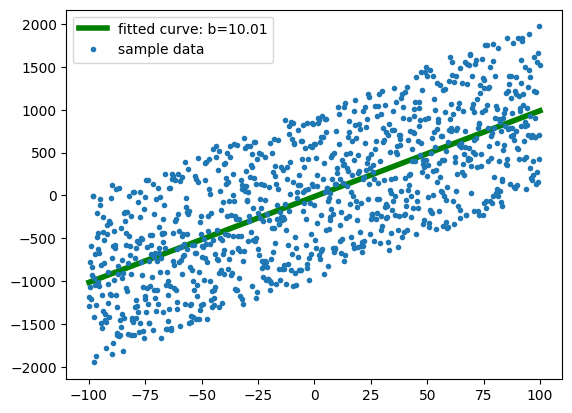

In [8]:
plt.plot(x,lm.predict(x),'g-', 
   label = 'fitted curve: b={0:2.2f}'.format(lm.coef_[0][0]),
   linewidth = 4)
plt.plot(x,y,'.', label = 'sample data')
plt.legend()
plt.show()

## Use Ordinary Linear Regression (OLS) from statsmodels library
Note that OLS specification is: <br>
$y = {b_0}\times{x_0} + {b_1}\times{x_1} + \varepsilon$ 

This implies that $x_0=1$ must also be provided



In [9]:
import statsmodels.api as sm
X = sm.add_constant(x) # X 
sm_model = sm.OLS(y, X)
results = sm_model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     1057.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):          9.55e-159
Time:                        12:50:42   Log-Likelihood:                -7750.7
No. Observations:                1000   AIC:                         1.551e+04
Df Residuals:                     998   BIC:                         1.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8152     17.794     -0.720      0.4

## Parabolic data

#### Generate data

In [10]:
# generate noisy data
a = 20
b = 10
c = 0.5
x = np.linspace(-100,100,1000)
y = a + b*x + c*x**2 + np.random.uniform(low=-1000,high=1000,size=x.shape)
data= pd.DataFrame({'y':y, 'x':x})
data.head()

,y,x
0,3771.355323,-100.000000
1,3352.851199,-99.799800
2,3683.957330,-99.599600
3,3838.039972,-99.399399
4,3642.493197,-99.199199


### Liniar fit (polinomial)

Polynom coefficients: a=1668.29, b=10.21


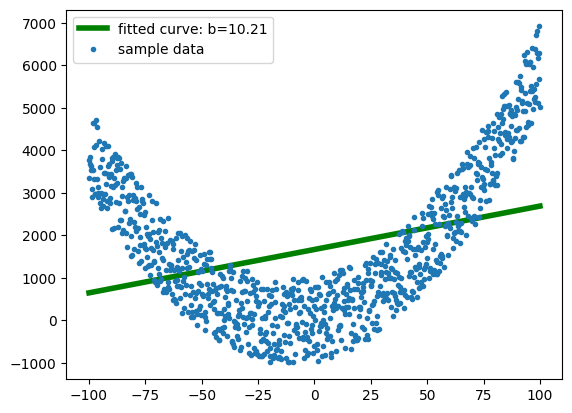

In [11]:
polynomial_coeff = np.polyfit(x, y, 1)
print('Polynom coefficients: a={0:2.2f}, b={1:2.2f}'.format(polynomial_coeff[1],polynomial_coeff[0]))
poly_fit_object = np.poly1d(polynomial_coeff)
# plot the data & the fit
plt.plot(x,poly_fit_object(x),'g-', 
       label = 'fitted curve: b={0:2.2f}'.format(polynomial_coeff[0]),
       linewidth = 4)
plt.plot(x,y,'.', label = 'sample data')
plt.legend()
plt.show()

###  Fit to second-degree polinomial:
$y=a + b\times{x} + c\times{x}^2$

Polynom coefficients: a=13.64, b=10.21, c=0.50


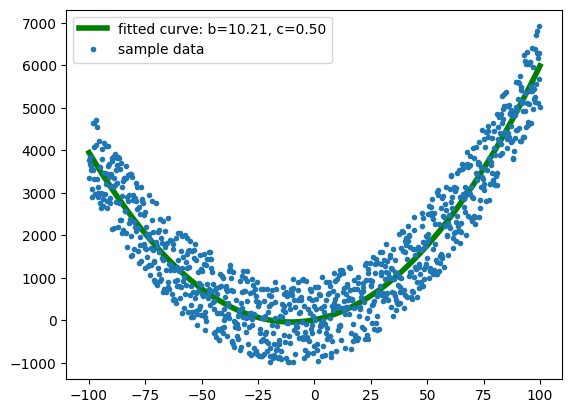

In [12]:
polynomial_coeff = np.polyfit(x, y, 2)
print('Polynom coefficients: a={0:2.2f}, b={1:2.2f}, c={2:2.2f}'.format(polynomial_coeff[2], polynomial_coeff[1],polynomial_coeff[0]))
# plot the data & the fit
plt.plot(x,np.polyval(polynomial_coeff,x),'g-', 
       label = 'fitted curve: b={0:2.2f}, c={1:2.2f}'.format(polynomial_coeff[1],polynomial_coeff[0]),
       linewidth = 4)
plt.plot(x,y,'.', label = 'sample data')
plt.legend()
plt.show()

### Regression analysis (2-nd order)
Now, try using regression with the model of: $$y = a+ bx + cx^2$$
X matrix has three columns: 
1. constant (all 1's)
2. x
3. x^2

In [13]:
data['x2'] = data['x']**2
data['intercept'] = 1
data.head()

,y,x,x2,intercept
0,3771.355323,-100.000000,10000.000000,1
1,3352.851199,-99.799800,9960.000040,1
2,3683.957330,-99.599600,9920.080240,1
3,3838.039972,-99.399399,9880.240601,1
4,3642.493197,-99.199199,9840.481122,1


In [14]:
import statsmodels.api as sm
sm_model = sm.OLS(data['y'], data[['intercept','x','x2']])
results = sm_model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     3737.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:                -7785.2
No. Observations:                1000   AIC:                         1.558e+04
Df Residuals:                     997   BIC:                         1.559e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.6408     27.642      0.493      0.6

## Use Sklearn linear regression to learn the curve coefficients

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = x.reshape((len(x), 1))  # Reshape x
y = y.reshape((len(y), 1))  # Reshape y

lm = LinearRegression()
lm.fit(x, y)

# Predict y for calculating R^2
y_pred = lm.predict(x)

# Now print properly
print(f"Regression trained: R^2 = {r2_score(y, y_pred):3.3f}")  # Corrected to actually print R^2
print(f"y ~ {lm.intercept_[0]:2.2f} + {lm.coef_[0,0]:2.2f} * x")

Regression trained: R^2 = 0.121
y ~ 1668.29 + 10.21 * x


# Diamond Prices

#### Load the Diamond Data

In [16]:
data = pd.read_csv('local_data/diamonds.zip', index_col=0)
print(f"Loaded {data.shape[0]}x{data.shape[1]}")

Loaded 53940x10


## Model dianond price with Ordinary Least Squares: Polynomial regression
Assumption: the price depends quadratically on the diamodn size:<br>
$price = b_0 + b_1\times{carat} + b_2\times{carat^2}$

In [17]:
import statsmodels.api as sm

data_for_fit = data[['price','carat']].copy()

data_for_fit['carat_2'] = data_for_fit['carat']**2

sm_model = sm.OLS(data_for_fit['price'], data_for_fit[['carat','carat_2']])
ols_res = sm_model.fit()
print (ols_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.914
Method:                 Least Squares   F-statistic:                          2.882e+05
Date:                Tue, 11 Nov 2025   Prob (F-statistic):                        0.00
Time:                        12:50:42   Log-Likelihood:                     -4.7579e+05
No. Observations:               53940   AIC:                                  9.516e+05
Df Residuals:                   53938   BIC:                                  9.516e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
import statsmodels.formula.api as smf
def square(x):
    return x*x

def cube(x):
    return x*x*x
data['stress_level']=data['price']
smf_model = smf.ols(formula='price ~ carat + square(carat) + cube(carat)',data=data)
ols_res = smf_model.fit()
print (ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 1.152e+05
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:50:42   Log-Likelihood:            -4.6976e+05
No. Observations:               53940   AIC:                         9.395e+05
Df Residuals:                   53936   BIC:                         9.396e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -198.3337     30.014     -6.608

### Demonstrate prediction

C:\Users\zvibe\AppData\Local\Temp\ipykernel_5236\2288257820.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_mean = data.groupby(categories, as_index=True).agg({'price':'mean','carat':'mean'})


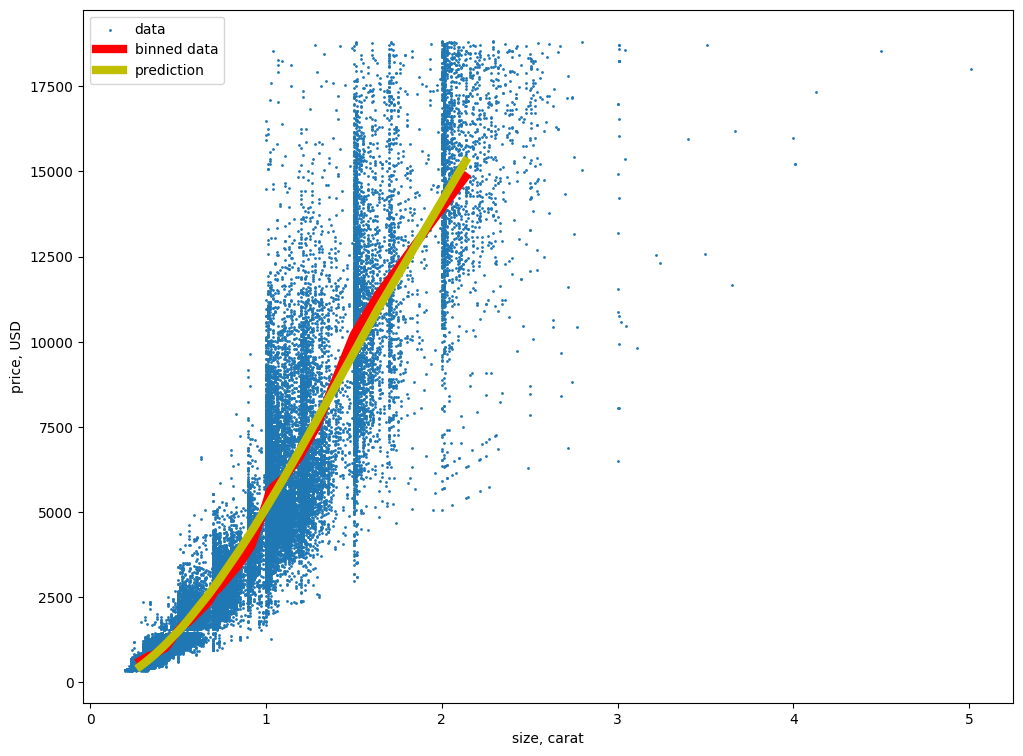

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
# scatter plot of the original data
plt.scatter(data['carat'], data['price'],s=1, label='data')

# original data binned. 
categories, bins = pd.qcut(data['carat'], q=25, retbins=True)
price_mean = data.groupby(categories, as_index=True).agg({'price':'mean','carat':'mean'})
plt.plot(price_mean['carat'], price_mean['price'], color='r', linewidth=6, label='binned data')

# OLS fit: 
test_data= price_mean[['carat']]
test_data['carat_2'] = test_data['carat']**2
test_data['intercept'] =1
ols_rediction = ols_res.predict(test_data[['intercept','carat','carat_2']])
plt.plot(test_data['carat'],ols_rediction, color='y',linewidth=6, label='prediction')

plt.xlabel('size, carat'); plt.ylabel('price, USD'); plt.legend();

In [20]:
ols_res.predict(test_data.iloc[1])

(0.3, 0.31]    573.161948
dtype: float64

### Multiple linear regression
<i>use many parameters to estimate price</i>
- price price in US dollars (\$326--\$18,823)
- carat weight of the diamond (0.2--5.01)
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length in mm (0--10.74)
- y width in mm (0--58.9)
- z depth in mm (0--31.8)
- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table width of top of diamond relative to widest point (43--95)


In [21]:
import statsmodels.formula.api as smf
def square(x):
    return x*x

def cube(x):
    return x*x*x

formula = '''price ~ 
    carat + square(carat) + cube(carat) + 
    C(cut) + C(color) + C(clarity) +
    depth + table + x + y + z
'''
smf_model_full = smf.ols(formula=formula,data=data)
ols_full_res = smf_model_full.fit()
print (ols_full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.736e+04
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:50:43   Log-Likelihood:            -4.5321e+05
No. Observations:               53940   AIC:                         9.065e+05
Df Residuals:                   53914   BIC:                         9.067e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             804.3665    

### Compare errors for the two OLS models

#### Compute errors

In [22]:
errors_carat_only = data['price'] - ols_res.predict(data)
errors_full = data['price'] - ols_full_res.predict(data)
print('errors_carat_only', errors_carat_only)
print('errors_errors_full', errors_full)

errors_carat_only 1          45.893096
2         109.493595
3          46.893096
4        -160.225879
5        -238.161948
            ...     
53936    -154.640875
53937    -154.640875
53938     -12.886813
53939   -1210.291147
53940    -371.731577
Length: 53940, dtype: float64
errors_errors_full 1        1430.946869
2         733.762573
3        -108.082061
4        1077.935272
5        3616.889234
            ...     
53936    -564.637457
53937    -300.639527
53938    -157.478812
53939     336.732134
53940     161.337759
Length: 53940, dtype: float64


Mean square errors: 
$MSE=\frac{1}{N}\sum{ {(X_i-{X_i}^{'})}^2}$

In [23]:
MSE1 = errors_carat_only.abs().mean() 
MSE2 = errors_full.abs().mean() 
print(f'MSE: Model 1={MSE1}. Model 2={MSE2:2.2f}')

MSE: Model 1=842.777028090477. Model 2=710.07


#### Plot Histogram of Errors

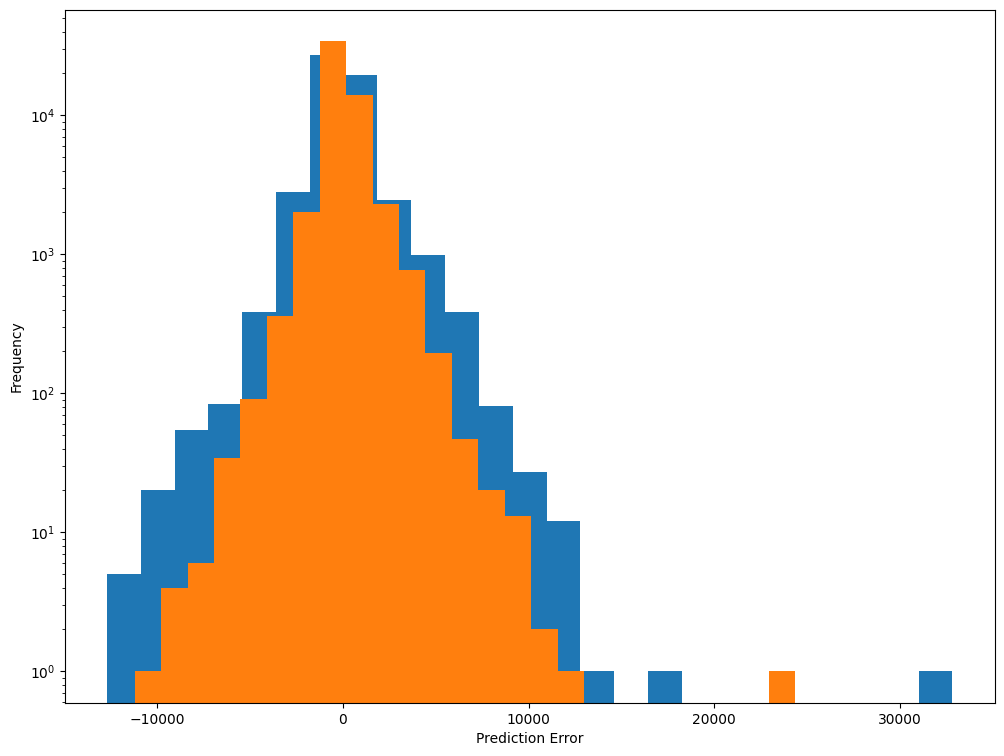

In [24]:
plt.figure(figsize=(12,9))
errors_carat_only.plot.hist(bins=25, ax=plt.gca(), label='carat only')
errors_full.plot.hist(bins=25, ax=plt.gca(), label='full model')
plt.yscale('log'); plt.xlabel('Prediction Error');

### Plot prediction vs. true value

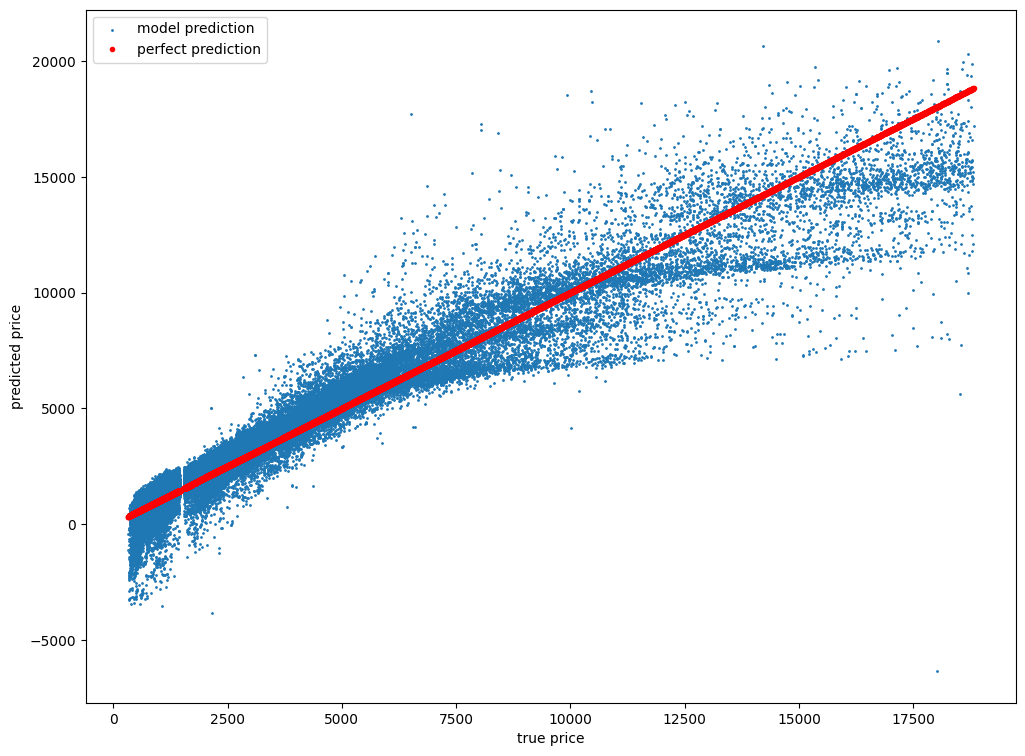

In [25]:
plt.figure(figsize=(12,9))
plt.scatter(data['price'], ols_full_res.predict(data),s=1, label='model prediction')
plt.plot(data['price'],data['price'],'.r', label='perfect prediction')
plt.xlabel('true price');plt.ylabel('predicted price'); plt.legend();

#### Using SKlearn

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

data_encoded = pd.get_dummies(data, drop_first=True)
y = data_encoded['price']
X = data_encoded.drop(columns=['price']) 

# Fit model
lm = LinearRegression()
lm.fit(X, y)

# Predict
y_pred = lm.predict(X) 

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.4349854584152735e-24


#### Gradient Descent

In [27]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss="squared_error", learning_rate="invscaling", eta0=0.01, max_iter=1000)
model.fit(X, y)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.4349854584152735e-24


## Regularization

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model as sklm

In [29]:
df = pd.DataFrame({'x':np.array(range(0,16)) * 2/16*np.pi})
df['x2'] = df['x']**2
df['x3'] = df['x']*df['x2']
df['x4'] = df['x']*df['x3']
df['x5'] = df['x']*df['x4']
df['x6'] = df['x']*df['x5']
df['x7'] = df['x']*df['x6']
df['x8'] = df['x']*df['x7']
df['x9'] = df['x']*df['x8']
df['x10'] = df['x']*df['x9']
df['x11'] = df['x']*df['x10']
df['x12'] = df['x']*df['x11']
df['x13'] = df['x']*df['x12']
df['x14'] = df['x']*df['x13']
df['x15'] = df['x']*df['x14']
df['x16'] = df['x']*df['x15']

df['y_org'] = np.sin(df['x'].values) 
df['y'] = df['y_org'] + 0.5 * np.random.normal(size=16)

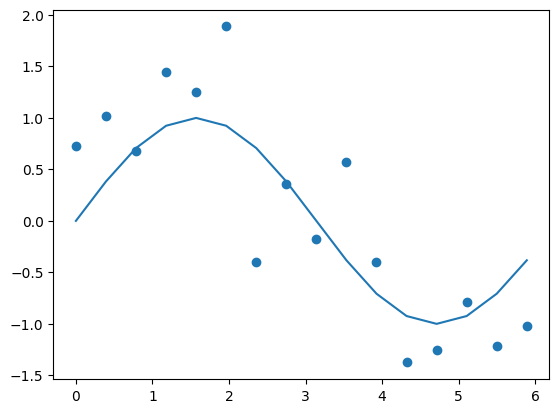

In [30]:
plt.plot(df['x'],df['y_org'])
plt.scatter(df['x'], df['y'] )
plt.show()

#### Polinomial regression

In [31]:
df['py1'] = sklm.LinearRegression().fit(df[['x']],df['y']).predict(df[['x']])

df['py2'] = sklm.LinearRegression().fit(df.iloc[:,0:2],df['y']).predict(df.iloc[:,0:2])
df['py4'] = sklm.LinearRegression().fit(df.iloc[:,0:4],df['y']).predict(df.iloc[:,0:4])
df['py8'] = sklm.LinearRegression().fit(df.iloc[:,0:8],df['y']).predict(df.iloc[:,0:8])
df['py16'] = sklm.LinearRegression().fit(df.iloc[:,0:16],df['y']).predict(df.iloc[:,0:16])


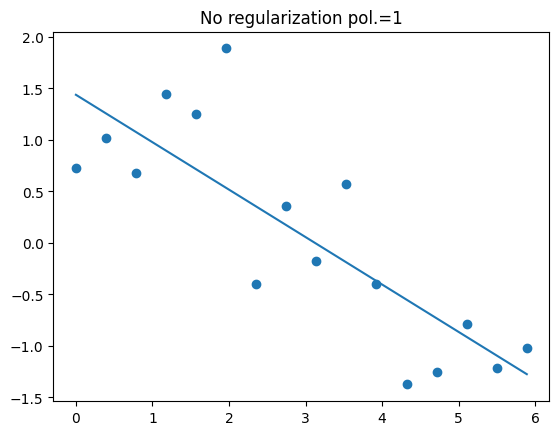

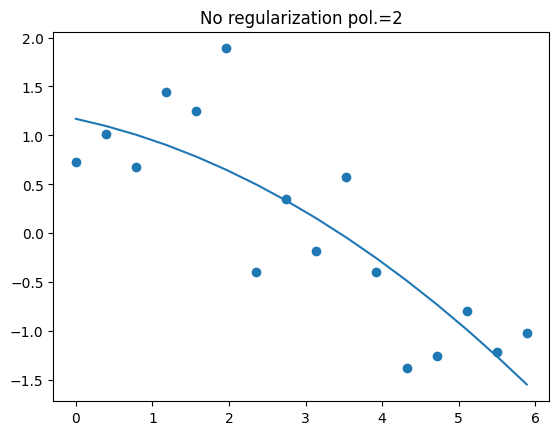

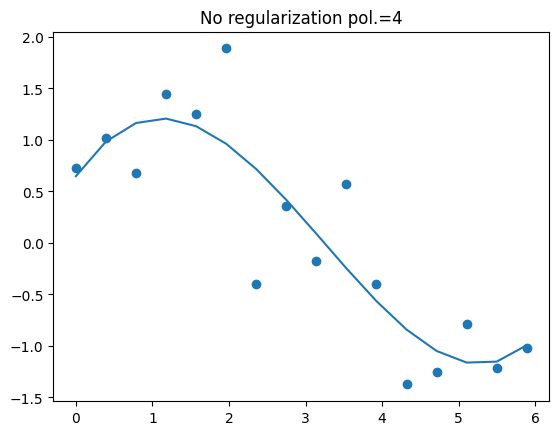

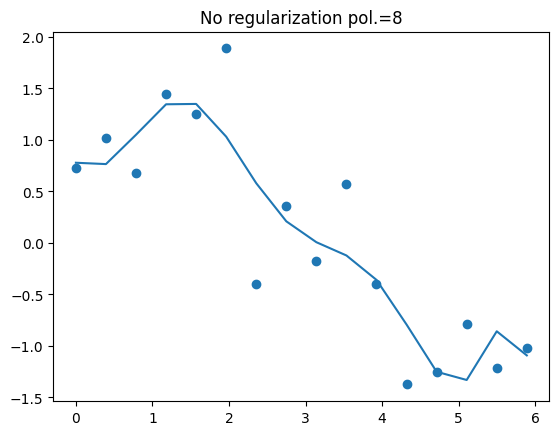

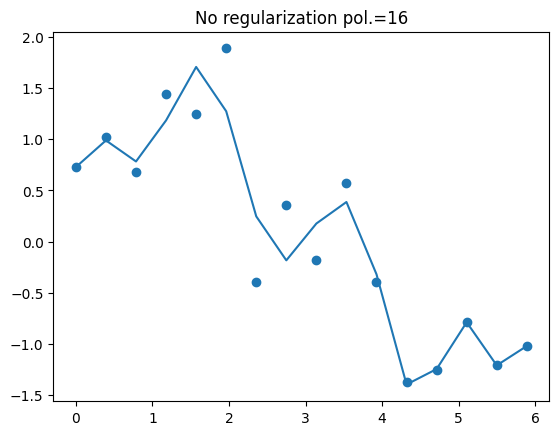

In [32]:
plt.plot(df['x'], df['py1'])
plt.scatter(df['x'], df['y'] )
plt.title('No regularization pol.=1')
plt.show()


plt.plot(df['x'], df['py2'])
plt.scatter(df['x'], df['y'] )
plt.title('No regularization pol.=2')
plt.show()


plt.plot(df['x'], df['py4'])
plt.scatter(df['x'], df['y'] )
plt.title('No regularization pol.=4')
plt.show()


plt.plot(df['x'], df['py8'])
plt.scatter(df['x'], df['y'] )
plt.title('No regularization pol.=8')
plt.show()

plt.plot(df['x'], df['py16'])
plt.scatter(df['x'], df['y'] )
plt.title('No regularization pol.=16')
plt.show()


#### Ridge Regularization

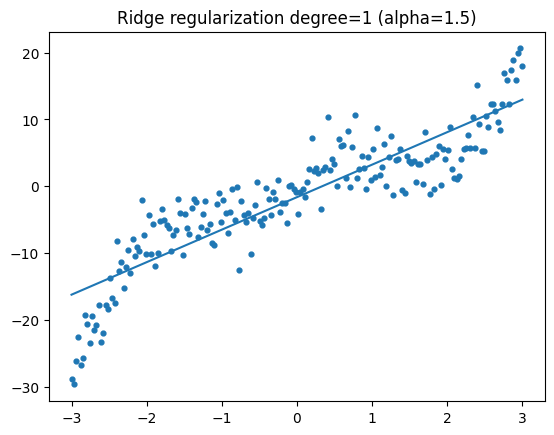

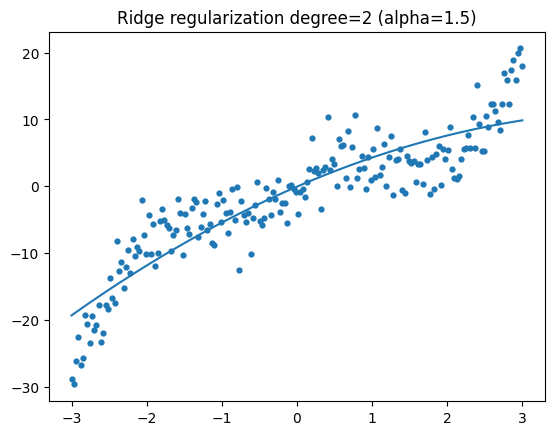

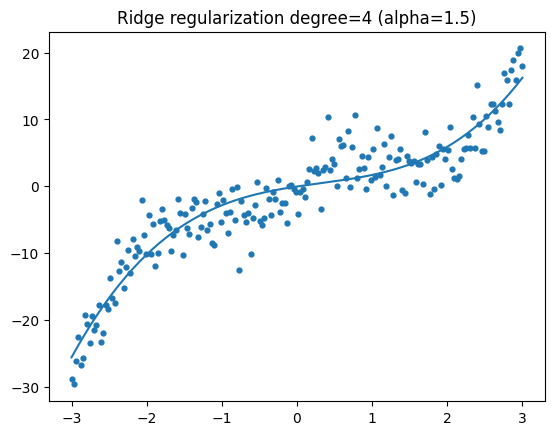

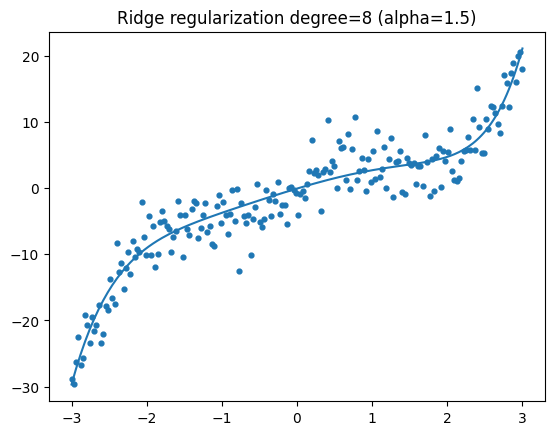

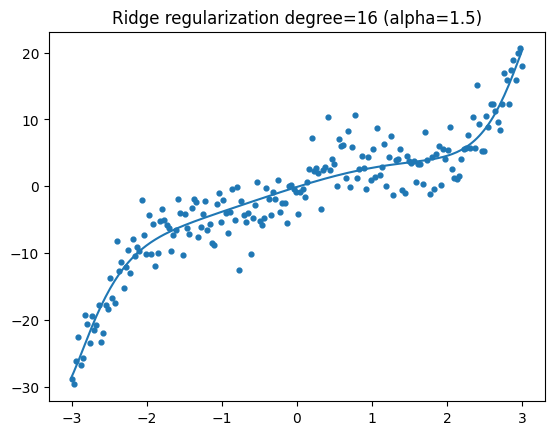

In [33]:
# === Ridge example (alpha=1.5) ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Synthetic nonlinear data
rng = np.random.RandomState(42)
x = np.linspace(-3, 3, 200)
y = (x**3 - 0.5*x**2) + 4*np.sin(2*x) + rng.normal(scale=3.0, size=x.shape)
df = pd.DataFrame({"x": x, "y": y})

degrees = [1, 2, 4, 8, 16]
alpha = 1.5

def ridge_pred(df, degree, alpha=alpha):
    pipe = Pipeline([
        ("poly",   PolynomialFeatures(degree=degree, include_bias=False)),
        ("scale",  StandardScaler()),
        ("model",  Ridge(alpha=alpha, random_state=0)),
    ])
    return pipe.fit(df[["x"]], df["y"]).predict(df[["x"]])

# Add predictions as columns (py1, py2, py4, py8, py16)
df["py1"]  = ridge_pred(df, 1)
df["py2"]  = ridge_pred(df, 2)
df["py4"]  = ridge_pred(df, 4)
df["py8"]  = ridge_pred(df, 8)
df["py16"] = ridge_pred(df, 16)

order = np.argsort(df["x"].values)

# Plots
plt.plot(df["x"].values[order], df["py1"].values[order])
plt.scatter(df["x"], df["y"], s=12)
plt.title("Ridge regularization degree=1 (alpha=1.5)")
plt.show()

plt.plot(df["x"].values[order], df["py2"].values[order])
plt.scatter(df["x"], df["y"], s=12)
plt.title("Ridge regularization degree=2 (alpha=1.5)")
plt.show()

plt.plot(df["x"].values[order], df["py4"].values[order])
plt.scatter(df["x"], df["y"], s=12)
plt.title("Ridge regularization degree=4 (alpha=1.5)")
plt.show()

plt.plot(df["x"].values[order], df["py8"].values[order])
plt.scatter(df["x"], df["y"], s=12)
plt.title("Ridge regularization degree=8 (alpha=1.5)")
plt.show()

plt.plot(df["x"].values[order], df["py16"].values[order])
plt.scatter(df["x"], df["y"], s=12)
plt.title("Ridge regularization degree=16 (alpha=1.5)")
plt.show()


Tips:
- If the Ridge curves are too wiggly/overfit, increase alpha (e.g., ×3).
- If they’re too flat/underfitting, decrease alpha (e.g., ÷3 or ×0.1).
- Standardize features (use StandardScaler) so alpha is comparable across degrees and datasets.
- As polynomial degree increases, raise alpha to keep the fit smooth.
- Tune alpha on a log scale (e.g., np.logspace(-4, 4, ...)) or use RidgeCV.
- Sort x before plotting to get smooth lines in 1D demos.
- With correlated features, Ridge stabilizes weights better than plain OLS.
- If you need sparsity (zeroed features), switch to Lasso or ElasticNet—not Ridge.

#### Lasso Regularization

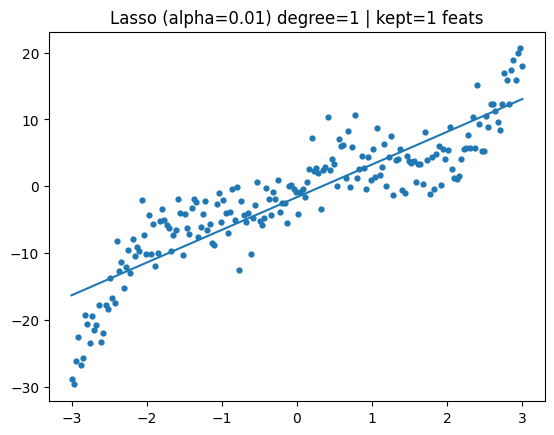

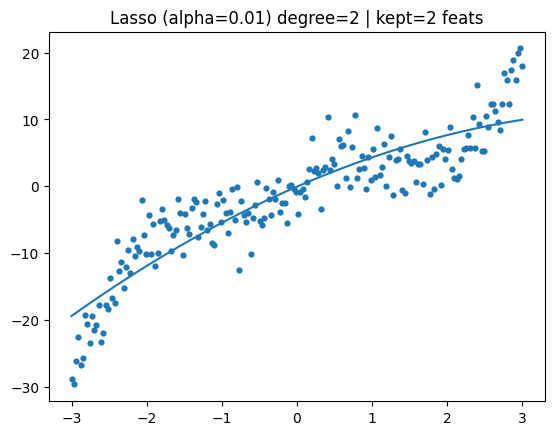

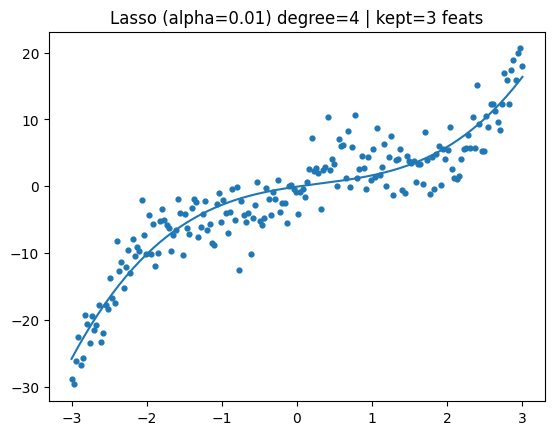

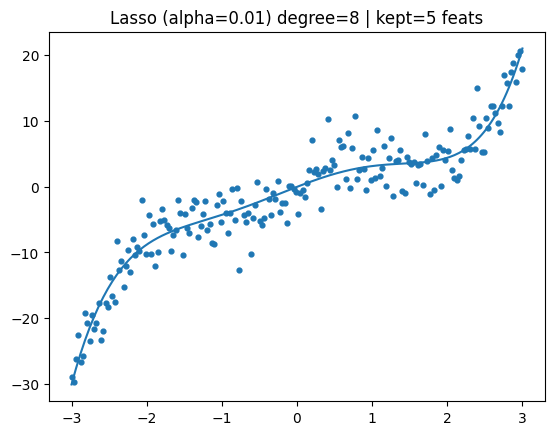

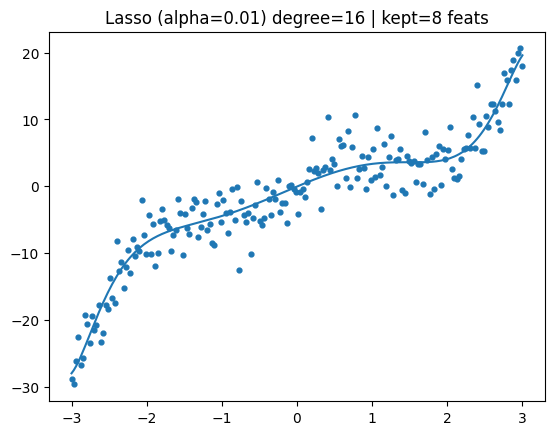

Lasso non-zero coefficients by degree: {1: 1, 2: 2, 4: 3, 8: 5, 16: 8}


In [34]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

# --- synthetic nonlinear data ---
rng = np.random.RandomState(42)
x = np.linspace(-3, 3, 200)
y = (x**3 - 0.5*x**2) + 4*np.sin(2*x) + rng.normal(scale=3.0, size=x.shape)
df = pd.DataFrame({"x": x, "y": y})
order = np.argsort(df["x"].values)

degrees = [1, 2, 4, 8, 16]
alpha_lasso = 0.01   # tune this: lower = more wiggly, higher = flatter

def fit_predict(model, deg):
    pipe = make_pipeline(
        PolynomialFeatures(degree=deg, include_bias=False),
        StandardScaler(),
        model
    )
    yhat = pipe.fit(df[["x"]], df["y"]).predict(df[["x"]])
    return pipe, yhat

# --- fit Lasso for all degrees ---
lasso_preds, lasso_kept = {}, {}
for d in degrees:
    l_model, l_pred = fit_predict(
        Lasso(alpha=alpha_lasso, max_iter=10000, random_state=0), d
    )
    lasso_preds[d] = l_pred
    # how many features Lasso keeps (non-zero after polynomial expansion)
    lasso_kept[d] = int(np.count_nonzero(l_model.named_steps["lasso"].coef_))

# --- plots ---
for d in degrees:
    plt.figure()
    plt.scatter(df["x"], df["y"], s=12)
    plt.plot(df["x"].values[order], lasso_preds[d][order])
    plt.title(f"Lasso (alpha={alpha_lasso}) degree={d} | kept={lasso_kept[d]} feats")
    plt.show()

print("Lasso non-zero coefficients by degree:", lasso_kept)



Tips:
- If the Lasso lines are too flat, reduce alpha by 10× (e.g., 0.01 → 0.001).
- If they’re too wiggly/overfit, increase alpha.
- Keeping StandardScaler in the pipeline is crucial so alpha behaves consistently.

### ElasticNet Regularization

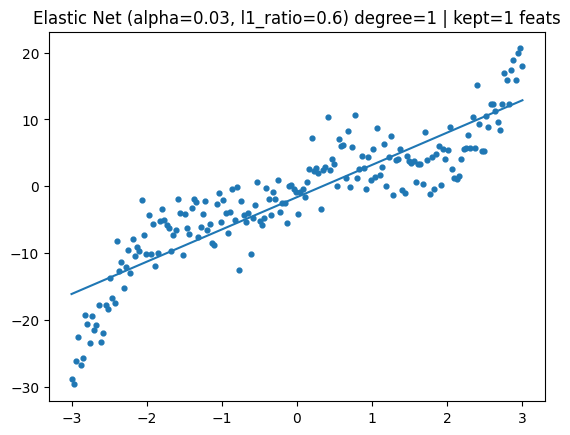

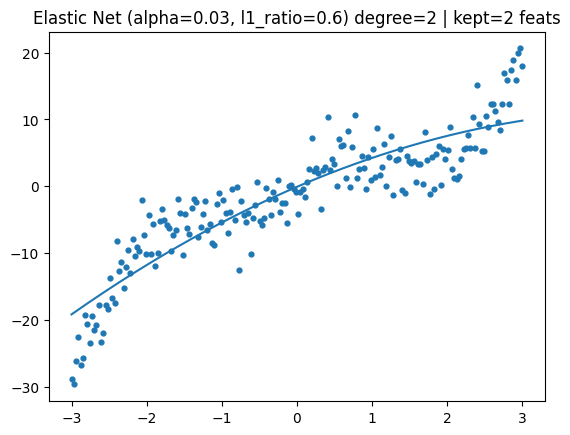

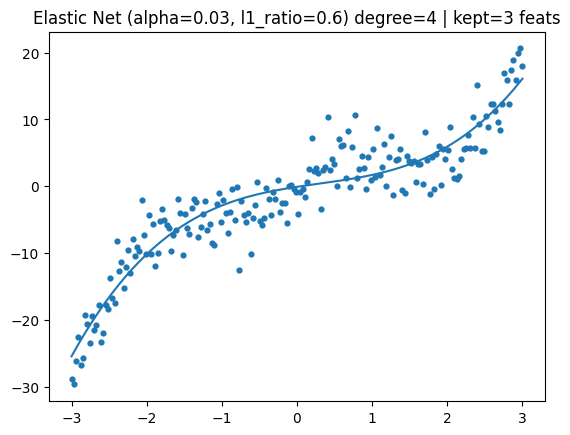

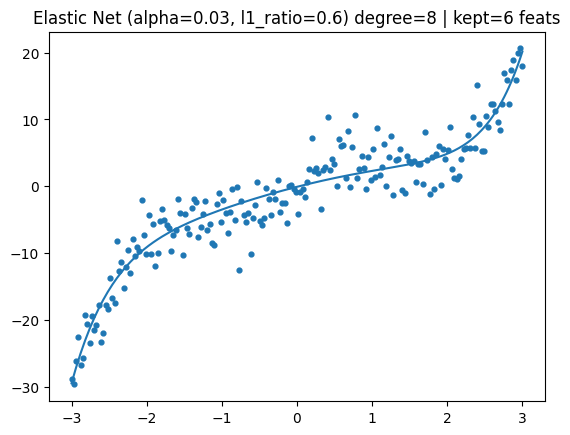

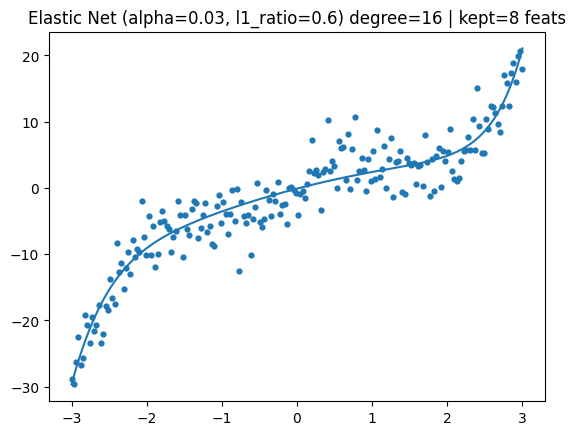

Elastic Net non-zero coefficients by degree: {1: 1, 2: 2, 4: 3, 8: 6, 16: 8}


In [35]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet

# --- synthetic nonlinear data (same as yours) ---
rng = np.random.RandomState(42)
x = np.linspace(-3, 3, 200)
y = (x**3 - 0.5*x**2) + 4*np.sin(2*x) + rng.normal(scale=3.0, size=x.shape)
df = pd.DataFrame({"x": x, "y": y})
order = np.argsort(df["x"].values)

degrees = [1, 2, 4, 8, 16]
alpha_en = 0.03        # overall regularization strength
l1_ratio_en = 0.6      # 1.0=Lasso, 0.0=Ridge

def fit_predict(model, deg):
    pipe = make_pipeline(
        PolynomialFeatures(degree=deg, include_bias=False),
        StandardScaler(),
        model
    )
    yhat = pipe.fit(df[["x"]], df["y"]).predict(df[["x"]])
    return pipe, yhat

# --- fit Elastic Net for all degrees ---
en_preds, en_kept = {}, {}
for d in degrees:
    en_model, en_pred = fit_predict(
        ElasticNet(alpha=alpha_en, l1_ratio=l1_ratio_en, max_iter=10000, random_state=0),
        d
    )
    en_preds[d] = en_pred
    # non-zero after polynomial expansion (feature selection effect)
    en_kept[d] = int(np.count_nonzero(en_model.named_steps["elasticnet"].coef_))

# --- plots: Elastic Net for each degree ---
for d in degrees:
    plt.figure()
    plt.scatter(df["x"], df["y"], s=12)
    plt.plot(df["x"].values[order], en_preds[d][order])
    plt.title(f"Elastic Net (alpha={alpha_en}, l1_ratio={l1_ratio_en}) degree={d} | kept={en_kept[d]} feats")
    plt.show()

print("Elastic Net non-zero coefficients by degree:", en_kept)


Tuning tips:
- If curves are too flat, decrease alpha_en (e.g., 0.03 → 0.01).
- If curves are too wiggly/overfit, increase alpha_en (e.g., 0.03 → 0.1).
- Use l1_ratio_en to blend selection vs. shrinkage:
- closer to 1.0 → more Lasso-like (more zeros),
- closer to 0.0 → more Ridge-like (fewer zeros).
- Keeping StandardScaler in the pipeline ensures alpha and l1_ratio behave consistently across degrees.

# Logit – Affairs

<h2>Database description</h2>
Description of Variables<br>
The dataset contains 6366 observations of 9 variables:
<ul>
<li>rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)</li>
<li>age: woman's age</li>
<li>yrs_married: number of years married</li>
<li>children: number of children</li>
<li>religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)</li>
<li>educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)</li>
<li>occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)</li>
<li>occupation_husb: husband's occupation (same coding as above)</li>
<li>affairs: time spent in extra-marital affairs</li>
</ul>
http://www.statsmodels.org/stable/datasets/generated/fair.html

<h4>Load the Data</h4>

In [36]:
import statsmodels.api as sm
dataset = sm.datasets.fair.load()

<h3>Prepare the Data</h3>

In [37]:
affairs_data = pd.DataFrame(dataset.exog, columns=dataset.exog_name)
affairs_data[dataset.endog_name] = dataset.endog
affairs_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [38]:
affairs_data['had_affairs'] = affairs_data['affairs'].apply(lambda x:1 if x>0 else 0)
affairs_data=affairs_data.drop(['affairs'], axis=1)

In [39]:
print(affairs_data.head())

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb  had_affairs  
0              5.0            1  
1              4.0            1  
2              5.0            1  
3              5.0            1  
4              4.0            1  


#### Replace occupation with string

In [40]:
def occupation_2_str(x, prefix):
    occupation_coding = ['student','farming', 'white collar', 'skilled', 'advanced degree','managerial']
    return prefix + '_' + occupation_coding[int(x)-1]
affairs_data['occupation_husb'] = affairs_data['occupation_husb'].apply(occupation_2_str,args=('husb',))
affairs_data['occupation'] = affairs_data['occupation'].apply(occupation_2_str,args=('wife',))

In [41]:
import statsmodels.formula.api as smf
formula='had_affairs ~ rate_marriage + age + yrs_married + children + religious+educ + C(occupation_husb) + C(occupation)' 
smf_model = smf.logit(formula=formula, data=affairs_data)
results = smf_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            had_affairs   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6349
Method:                           MLE   Df Model:                           16
Date:                Tue, 11 Nov 2025   Pseudo R-squ.:                  0.1365
Time:                        12:50:47   Log-Likelihood:                -3456.2
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                1.534e-222
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   4.1973      0.353     11.896      0.000       3.506       4.889
C(occupation_husb)[T.husb_farming]         -0.0019      0.088     -0.021      0.983      -0.174       0.170
C(occupation_husb)[T.husb_managerial]       0.0104      0.120      0.087      0.931      -0.226       0.247
C(occupation_husb)[T.husb_skilled]         -0.0295      0.077     -0.384      0.701      -0.180       0.121
C(occupation_husb)[T.husb_student]         -0.1723      0.183     -0.944      0.345      -0.530       0.186
C(occupation_husb)[T.husb_white collar]     0.1118      0.118      0.951      0.342      -0.119       0.342
C(occupation)[T.wife_farming]              -0.6640      0.119     -5.573      0.000      -0.897      -0.430
C(occupation)[T.wife_managerial]            0.0538      0.246      0.219      0.827      -0.428       0.535
C(occupation)[T.wife_skilled]              -0.5828      0.105     -5.574      0.000      -0.788      -0.378
C(occupation)[T.wife_student]              -1.0542      0.447     -2.360      0.018      -1.930      -0.179
C(occupation)[T.wife_white collar]         -0.3515      0.094     -3.745      0.000      -0.535      -0.168
rate_marriage                              -0.7102      0.031    -22.560      0.000      -0.772      -0.649
age                                        -0.0613      0.010     -5.936      0.000      -0.082      -0.041
yrs_married                                 0.1080      0.011      9.836      0.000       0.086       0.129
children                                    0.0156      0.032      0.488      0.625      -0.047       0.078
religious                                  -0.3754      0.035    -10.766      0.000      -0.444      -0.307
educ                                       -0.0017      0.017     -0.099      0.921      -0.036       0.032
===========================================================================================================
"""

#### Accessing regression parameters

In [42]:
results.params

Intercept                                  4.197281
C(occupation_husb)[T.husb_farming]        -0.001882
C(occupation_husb)[T.husb_managerial]      0.010434
C(occupation_husb)[T.husb_skilled]        -0.029488
C(occupation_husb)[T.husb_student]        -0.172329
C(occupation_husb)[T.husb_white collar]    0.111844
C(occupation)[T.wife_farming]             -0.663959
C(occupation)[T.wife_managerial]           0.053818
C(occupation)[T.wife_skilled]             -0.582800
C(occupation)[T.wife_student]             -1.054197
C(occupation)[T.wife_white collar]        -0.351518
rate_marriage                             -0.710228
age                                       -0.061279
yrs_married                                0.107976
children                                   0.015645
religious                                 -0.375386
educ                                      -0.001725
dtype: float64

In [43]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'stress_level'],
      dtype='object')

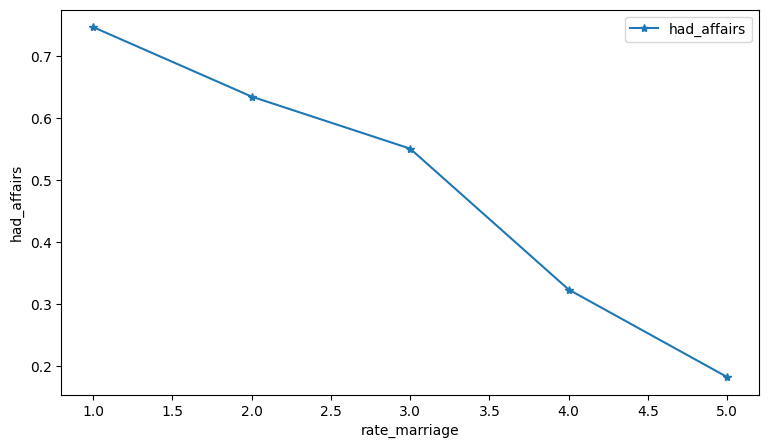

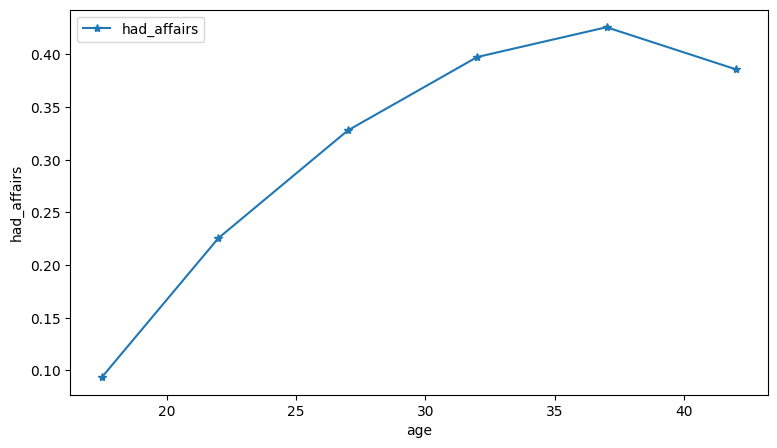

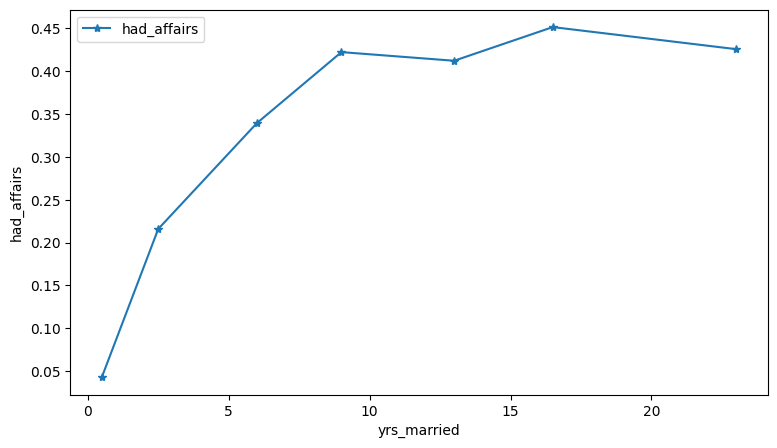

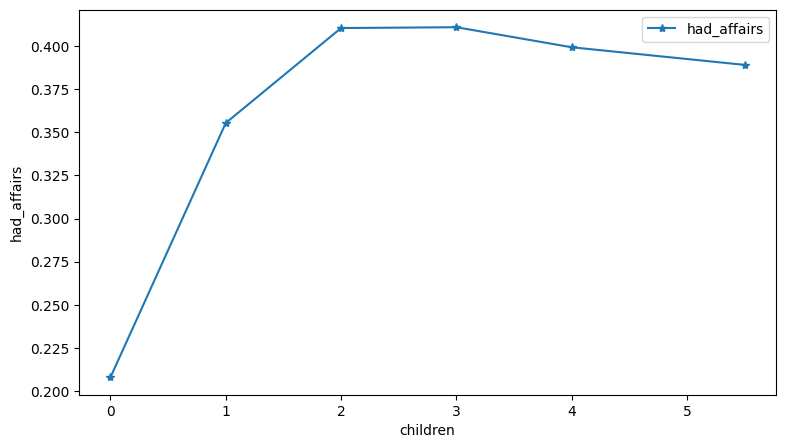

In [44]:
for attribute_name in ['rate_marriage','age','yrs_married','children']:
    mean_over_attribute = affairs_data.groupby(attribute_name).agg({attribute_name:'mean', 'had_affairs':'mean'})
    ax = mean_over_attribute.plot(x=attribute_name, y='had_affairs',figsize=(9,5), marker='*')
    ax.set_xlabel(attribute_name); ax.set_ylabel('had_affairs')

In [45]:
attribute_names = ['rate_marriage','age','yrs_married','children']
corrcoef = np.corrcoef(affairs_data[attribute_names].T)
print('Cross-correlation matrix:\n{0}'.format(attribute_names))
print(corrcoef)

Cross-correlation matrix:
['rate_marriage', 'age', 'yrs_married', 'children']
[[ 1.         -0.11112684 -0.12897845 -0.1291612 ]
 [-0.11112684  1.          0.89408184  0.67390214]
 [-0.12897845  0.89408184  1.          0.7728057 ]
 [-0.1291612   0.67390214  0.7728057   1.        ]]


## Logit using sklearn

In [46]:
from sklearn.linear_model import LogisticRegression

y = affairs_data['had_affairs']
X = affairs_data.drop('had_affairs',axis=1)
X = pd.get_dummies(X)
log_reg = LogisticRegression().fit(X,y)

c:\Users\zvibe\anaconda3\envs\AI_dev\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
log_reg.score(X,y)

0.7238454288407163

In [48]:
log_reg.predict(X.iloc[-1].values.reshape(1, -1))

c:\Users\zvibe\anaconda3\envs\AI_dev\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)